## Rayner Taos Stochastic Trading Strategy

#### Trading Rules
- Market
    - Russell 1000
- Trend
    - The stock is above the 200-day moving average
- Entry
    - The 10-period Stochastic (K%) is below 5 (It compares the closing price of an asset to its price range over a specified period, typically 10 days, to determine whether the asset is overbought or oversold.)
    - 3% buy limit order
- Exit
    - On a higher close
    - Or after 10 trading days

In [80]:
import yfinance as yf
import ta
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
df = yf.download('EURUSD=X', start = '2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [82]:
def indicators(df):
    df['sma_200'] = ta.trend.sma_indicator(df.Close, window = 200)
    df['stoch_k'] = ta.momentum.stochrsi_k(df.Close, window = 10)
    df.dropna(inplace = True)


In [83]:
indicators(df)

In [84]:
df['Buy'] = (df.Close > df.sma_200) & (df.stoch_k < 0.05)

In [85]:
buydates, selldates = [], []
buys, sells = [], []

last_selldate = pd.to_datetime('1900-01-01')

for row in range(len(df)):
    if len(selldates) > 0:
        last_selldate = selldates[-1]

    if df.iloc[row].Buy:
        buyprice = df.iloc[row].Close * 0.97
        k = 1
        while True:
            if buyprice >= df.iloc[row + k].Low:
                buydate = df.iloc[row + k].name
                break
            elif k > 10:
                break
            else:
                k += 1
        
        if buydate > last_selldate:
            buydates.append(buydate)
            buys.append(buyprice)
            for i in range(1, 11):
                if df.iloc[row + k + i].Close > buyprice:
                    sellprice = df.iloc[row + k + i + 1].Open
                    selldate = df.iloc[row + k + i + 1].name
                    sells.append(sellprice)
                    selldates.append(selldate)
                    break
                elif i == 10:
                    sellprice = df.iloc[row + k + i + 1].Open
                    selldate = df.iloc[row + k + i + 1].name
                    sells.append(sellprice)
                    selldates.append(selldate)

        

In [86]:
buydates, selldates

([Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:00:00'),
  Timestamp('2024-08-05 00:0

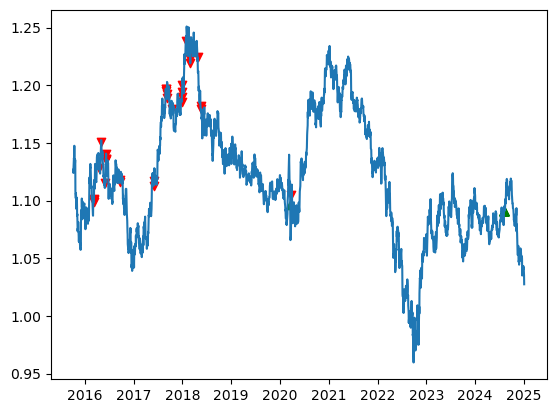

In [87]:
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker = '^', c = 'g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker = 'v', c = 'r')

In [88]:
profits = pd.DataFrame([(sell - buy)/buy for sell, buy in zip(sells, buys)])

In [89]:
(profits + 1).cumprod()

,0
0,1.020822
1,1.042066
2,1.061064
3,1.105651
4,1.163355
5,1.182158
6,1.222483
7,1.276204
8,1.333350
9,1.397165
